In [8]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 



from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [9]:
train_data = pd.read_csv('train.csv', index_col= 0)
test_data = pd.read_csv('test.csv', index_col= 0)

In [10]:
train_data.shape

(8523, 11)

In [12]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [15]:
test_data.shape

(5681, 10)

In [16]:
test_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [18]:
# Conboine the two dataset
train_data["source"] = "train_data"
test_data ["source"] = "test_data"
data = pd.concat([train_data,test_data],ignore_index=True)
data.shape

(14204, 12)

In [19]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [20]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
data.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [22]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [24]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [25]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [26]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [28]:
data["Outlet_Size"].mode()[0]

'Medium'

In [29]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [30]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

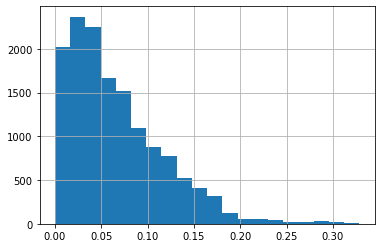

In [31]:
data["Item_Visibility"].hist(bins=20)

In [32]:
Q1 = data["Item_Visibility"].quantile(0.25)

In [34]:
Q3 = data["Item_Visibility"].quantile(0.75)

In [36]:
IQR = Q3-Q1

In [37]:
fill_data= data.query('(@Q1 -1.5 * @IQR) <= Item_Visibility <=  (@Q3 + 1.5 * @IQR)') 

In [38]:
fill_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train_data
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [39]:
fill_data.shape

(13943, 12)

In [40]:
data = fill_data

In [41]:
data.shape

(13943, 12)

In [42]:
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2], labels = ['Low Viz','Viz','High Viz'])

In [43]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [44]:
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan,"Low Viz", regex= True)

In [45]:
#  Modifying the item fata content column
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low Fat","LF"],"low fat")

data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [46]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg","Regular")
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [47]:
data["Item_Fat_Content"].value_counts()

Low Fat    8352
Regular    4911
low fat     680
Name: Item_Fat_Content, dtype: int64

In [48]:
#  Encoding various labels in the dataset
le = LabelEncoder()

In [49]:
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"]) 

In [50]:
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"]) 

In [51]:
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"]) 

In [52]:
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"]) 

In [53]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [54]:
data.head()
# dummy = pd.get_dummies(data["Outlet_Type"])
# dummy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_bins
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train_data,1
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train_data,1
2,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train_data,1
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train_data,3
4,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train_data,3


In [55]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source', 'Item_Visibility_bins'],
      dtype='object')

In [57]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Visibility_bins           int32
dtype: object

In [58]:
data["source"].unique()

array(['train_data', 'test_data'], dtype=object)

In [59]:
train = data.loc[data["source"]== "train_data"]
test = data.loc[data["source"] == "test_data"]
test.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)

In [62]:
# Expoting modifies data to csv file 
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [63]:
#  Load the modified dataset 
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [64]:
train2.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Visibility_bins           int64
dtype: object

In [65]:
train2.shape

(8375, 12)

In [66]:
train2["Item_Type"] = le.fit_transform(train2["Item_Type"]) 

In [67]:
X_train = train2.drop(["Item_Outlet_Sales","Outlet_Identifier"],axis=1)
y_train = train2.Item_Outlet_Sales

In [68]:
test2.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Visibility_bins           int64
dtype: object

In [69]:
X_train['Outlet_Type'] = le.fit_transform(X_train["Outlet_Type"]) 

In [70]:
X_train.shape

(8375, 10)

In [71]:
y_train.shape

(8375,)

In [72]:
X_test = X_train.iloc[4188:8375]
y_test = y_train.iloc[4188:8375]

In [73]:
X_test.shape

(4187, 10)

In [74]:
y_test.shape

(4187,)

In [75]:
X_train = X_train.iloc[:4187]
y_train = y_train.iloc[:4187]

In [76]:
X_train.shape

(4187, 10)

In [77]:
y_train.shape

(4187,)

In [79]:
X_train['Outlet_Type'] = le.fit_transform(X_train["Outlet_Type"])
X_test['Outlet_Type'] = le.fit_transform(X_test["Outlet_Type"])

In [80]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression

In [81]:
lin = LinearRegression()

In [82]:
lin.fit(X_train,y_train)

LinearRegression()

In [83]:
y_pred= lin.predict(X_train)

In [91]:
from sklearn.metrics import r2_score 

In [92]:
r2_score(y_train,y_pred)

0.5050771368745063